# week2 授業課題2 富士山下山

## 富士山から下る
>標高データの取得

In [1]:
import numpy as np

csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

## 【問題1】データの可視化

In [2]:
print(fuji[-1:,0])

[299.]


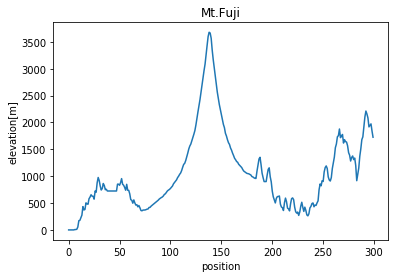

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(fuji[:,0],fuji[:,3])
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.title("Mt.Fuji")
plt.show()

## 【問題2】ある地点の勾配を計算する関数を作成

In [4]:
def compute_fujislope(point):
   
    d_x = fuji[point,0] - fuji[point-1,0]
    
    d_y = fuji[point,3] - fuji[point-1,3]
    gradient = d_y/d_x

    return gradient

compute_fujislope(7)

0.5899999999999999

## 【問題3】移動先の地点を計算する関数を作成
>今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。

>「移動先の地点 = 今いる地点 - α ×今いる地点の勾配」

>αは0より大きい任意の値をとるハイパーパラメータ

In [5]:
#例えば α = 0.2に設定
#取り得ない値となった場合の処理が必要

def moved_point(now_point,alpha=0.2):
    next_point_raw = now_point - alpha*compute_fujislope(now_point)
    
    next_point = round(next_point_raw) #四捨五入で整数にする
    
    if 0 <= next_point < 300:
        next_point = next_point
    
    else:
        next_point = print("この値は無効です。移動前の位置:{}".format(now_point))
    return int(next_point)

moved_point(68)

76

## 【問題4】山を下る関数を作成

In [6]:
# 下り切る　= 問題３　の関数の戻り値が　now = next

top_point = 136

def downfall_fuji(point,alpha=0.2):
    list_downfall = [fuji[point,0]] #初期値をリストに入れる
    next_place = moved_point(point,alpha) #移動先を next_place に
    
    while next_place != moved_point(next_place,alpha) : #現在地 != 移動先の時
        list_downfall.append(fuji[next_place,0]) #リストに地点を投げ込んでいく
        
        next_place = moved_point(next_place,alpha)
    
    list_downfall.append(fuji[next_place,0]) #現在地 = 移動先の時 while から抜ける
    
    return list_downfall
    

downfall_fuji(top_point,0.2)

[136.0,
 102.0,
 98.0,
 95.0,
 93.0,
 89.0,
 85.0,
 82.0,
 79.0,
 73.0,
 70.0,
 78.0,
 77.0,
 75.0]

In [27]:
def downfall_fuji_hight(point,alpha=0.01):
    list_downfall = [fuji[point,3]] #初期値をリストに入れる
    next_place = moved_point(point,alpha) #移動先を next_place に
    
    while next_place != moved_point(next_place,alpha) : #現在地 != 移動先の時
        list_downfall.append(fuji[next_place,3]) #リストに地点を投げ込んでいく
        
        next_place = moved_point(next_place,alpha)
    
    list_downfall.append(fuji[next_place,3]) #現在地 = 移動先の時 while から抜ける
    
    return list_downfall

downfall_fuji_hight(top_point,0.2)

[3434.59,
 817.62,
 741.17,
 672.36,
 631.71,
 575.07,
 505.1,
 458.66,
 418.41,
 368.91,
 412.27,
 390.14,
 386.64,
 371.19]

## 【問題5】下山過程の可視化

In [28]:
print(len(downfall_fuji(top_point,0.2)))

14


In [29]:
x = [i for i in range(len(downfall_fuji(top_point,0.2)))] 

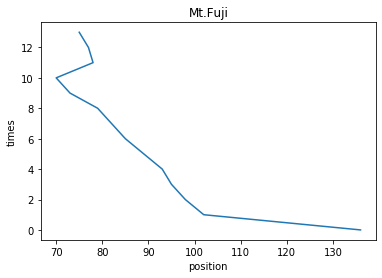

In [30]:
#地点表記

plt.plot(downfall_fuji(top_point,0.2),x)
plt.xlabel("position")
plt.ylabel("times")
plt.title("Mt.Fuji")
plt.show()

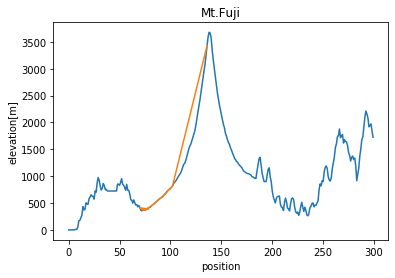

In [31]:
#標高表示
#富士山のグラフと併記したら

plt.plot(fuji[:,0],fuji[:,3])
plt.plot(downfall_fuji(top_point,0.2),downfall_fuji_hight(top_point,0.2))
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.title("Mt.Fuji")
plt.show()

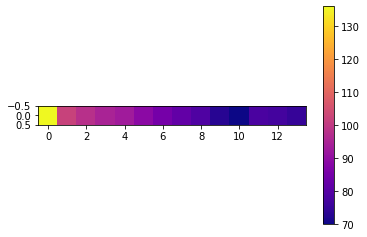

In [12]:
# 他の方法
import seaborn as sns
mat = np.array(downfall_fuji(top_point,0.2)).reshape(1,14)

# ヒートマップ表示
plt.figure()
plt.imshow(mat,interpolation='nearest',cmap='plasma')
plt.colorbar()
plt.show()

# 等高線で密度を表示
#sns.jointplot('petal_width', 'petal_length',data=iris, kind="kde")

## 【問題6】初期値の変更
>他の全ての点で計算してください。そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。

In [34]:
downfall_fuji(150,0.01)

[150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0]

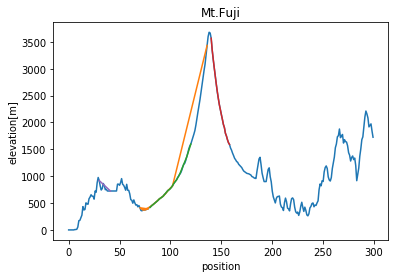

In [38]:
#downfall_fuji(point) に各地点代入
#０など、if moved_point(now_point)　がエラーの時、downfall_fuji(point) 計算しない.



plt.plot(fuji[:,0],fuji[:,3])
plt.plot(downfall_fuji(top_point,0.2),downfall_fuji_hight(top_point,0.2))
plt.plot(downfall_fuji(120,0.1),downfall_fuji_hight(120,0.1))
plt.plot(downfall_fuji(140,0.01),downfall_fuji_hight(140,0.01))
plt.plot(downfall_fuji(30,0.2),downfall_fuji_hight(30,0.2))
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.title("Mt.Fuji")
plt.show()

## 【問題7】（アドバンス問題）ハイパーパラメータの変更

In [15]:
#alpha = 0.5 の時
alpha = 0.5

def downfall_fuji(point,alpha=0.2):
    list_downfall = [fuji[point,0]] #初期値をリストに入れる
    next_place = moved_point(point,alpha) #移動先を next_place に
    
    while next_place != moved_point(next_place,alpha) : #現在地 != 移動先の時
        list_downfall.append(fuji[next_place,0]) #リストに地点を投げ込んでいく
        
        next_place = moved_point(next_place,alpha)
    
    list_downfall.append(fuji[next_place,0]) #現在地 = 移動先の時 while から抜ける
    
    return list_downfall
    

downfall_fuji(top_point,alpha)

[136.0, 52.0, 15.0, 46.0]

In [195]:
downfall_fuji_hight(top_point,alpha)

[3434.59, 955.14, 371.74, 724.5]

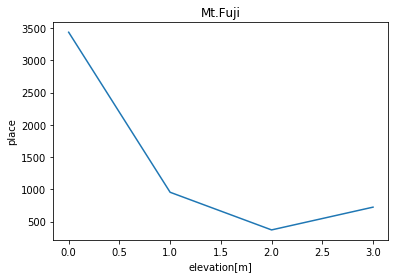

In [203]:
#標高表示
x_a = [i for i in range(len(downfall_fuji(top_point,alpha)))] 

plt.plot(x_a,downfall_fuji_hight(top_point,alpha))
plt.xlabel("elevation[m]")
plt.ylabel("place")
plt.title("Mt.Fuji")
plt.show()